In [421]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['image.cmap'] = 'gray'


[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


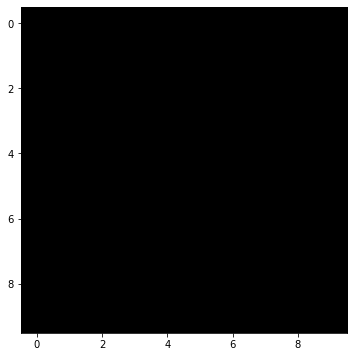

In [422]:
im = np.zeros((10, 10), dtype='uint8')
plt.imshow(im)
print(im)

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


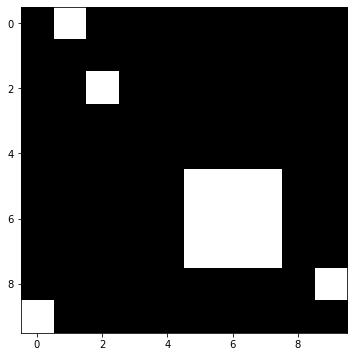

In [423]:
im[0, 1] = 1
im[-1, 0] = 1
im[-2, -1] = 1
im[2, 2] = 1
im[5:8, 5:8] = 1

plt.imshow(im)
print(im)

In [424]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
print(element)

#plt.imshow(element)
ksize = element.shape[0]
height, width = im.shape[:2]

[[0 1 0]
 [1 1 1]
 [0 1 0]]


[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


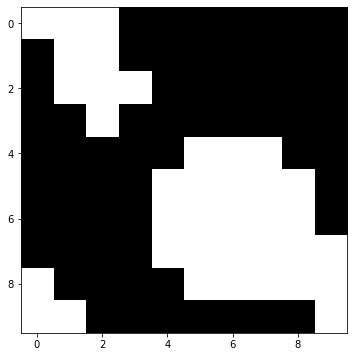

In [425]:
dilatedEllipseKernel = cv2.dilate(im, element)
print(dilatedEllipseKernel)
plt.imshow(dilatedEllipseKernel)

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0]
 [0 0 1]
 [0 0 0]]
1,1
[[0 0 0]
 [0 1 0]
 [0 0 0]]
1,2


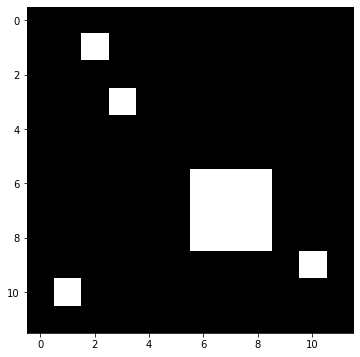

In [426]:
border = ksize // 2

paddedIm = np.zeros((height + border * 2, width + border * 2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value=0)
paddedDilatedIm = paddedIm.copy()
plt.imshow(paddedDilatedIm)
print(paddedDilatedIm)

print(paddedDilatedIm[0:3, 0:3])
print(f"{int((3 + 0) / 2)},{int((3 + 0) / 2)}")

print(paddedDilatedIm[0:3, 1:4])
print(f"{int((3 + 0) / 2)},{int((4 + 1) / 2)}")

In [427]:
# Create a VideoWriter object
# Use frame size as 50x50
###
### YOUR CODE HERE
###
plt.figure(figsize=[10, 10])
for h_i in range(border, height + border):
    for w_i in range(border, width + border):
        roi = paddedIm[h_i - border:h_i + border + 1, w_i - border:w_i + border + 1]
        cx = int(((h_i - border) + (h_i + border + 1)) // 2)
        cy = int(((w_i - border) + (w_i + border + 1)) // 2)
        if not paddedIm[cx, cy]:
            ops = cv2.bitwise_and(roi, element)
            if np.amax(ops):
                paddedDilatedIm[cx, cy] = np.amax(ops)
    # Resize output to 50x50 before writing it to the video
    ###
    ### YOUR CODE HERE
    ###
    # Convert resizedFrame to BGR before writing
    ###
    ### YOUR CODE HERE
    ###

# Release the VideoWriter object
###
### YOUR CODE HERE
###

<Figure size 720x720 with 0 Axes>

[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


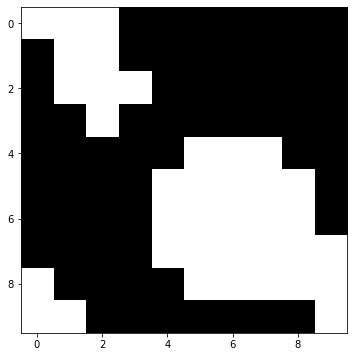

In [428]:
# Display final image (cropped)
dilatedImage = paddedDilatedIm[border:border + height, border:border + width]
print(dilatedImage)
plt.imshow(dilatedImage)